In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from geopy.geocoders import Nominatim, GoogleV3

In [3]:
path = r'T:\DCProjects\StoryMap\BikeCounting\BikeMap\data\InteractiveBikeMap.gdb'
bike_friendly_businesses = gpd.read_file(path, layer="Bike_Friendly_Businesses")

In [4]:
bike_friendly_businesses.head()

,Status,Score,Match_type,Match_addr,Side,Ref_ID,User_fld,Addr_type,ARC_Street,ARC_City,ARC_State,ARC_ZIP,Account_Na,Street,City,Zip_Postal,Date_Appro,Applicant,Region,geometry
0,M,89.04,M,"91049 S WILLAMETTE ST, Coburg, OR, 97408",,98634,,PointAddress,91049 SOUTH WILLAMETTE; BOX 8542,COBURG,,,Reflections Salon,91049 South Willamette; Box 8542,Coburg,97408,2015-11-25T00:00:00,Vicki Bell,Willamette Valley,POINT (4247692.024 910514.051)
1,M,100.00,A,"91003 S WILLAMETTE ST, Coburg, OR, 97408",,101760,,PointAddress,91003 S Willamette St,Coburg,,,The Oregon Handwork Studio,91003 S Willamette St,Coburg,97408,2016-04-28T00:00:00,Kathy Paterson,Willamette Valley,POINT (4247890.889 910107.994)
2,M,100.00,A,"90999 S WILLAMETTE ST, Coburg, OR, 97408",,134476,,PointAddress,PO Box 8008 90999 S Willamette St,Coburg,,,Coburg Pizza Company,PO Box 8008 90999 S Willamette St,Coburg,97408,2014-11-20T00:00:00,Terry Dawson,Willamette Valley,POINT (4247953.708 909940.685)
3,M,100.00,M,"91136 N WILLAMETTE ST, Coburg, OR, 97408",,134510,,PointAddress,91136 N. WILLAMETTE STREET,COBURG,,,City of Coburg,PO Box 8316,Coburg,97408,2014-10-24T00:00:00,Petra Schuetz,Willamette Valley,POINT (4247265.300 911467.629)
4,U,0.00,A,,,-1,,,500 West 15th,Eugene,,,Fort Dalles Museum,500 West 15th,Eugene,97058,2014-05-12T00:00:00,Trish Neal,Mt. Hood/Gorge,POINT (6052081273769120.000 6052081291735920.000)


In [5]:
bike_friendly_businesses.columns

Index(['Status', 'Score', 'Match_type', 'Match_addr', 'Side', 'Ref_ID',
       'User_fld', 'Addr_type', 'ARC_Street', 'ARC_City', 'ARC_State',
       'ARC_ZIP', 'Account_Na', 'Street', 'City', 'Zip_Postal', 'Date_Appro',
       'Applicant', 'Region', 'geometry'],
      dtype='object')

In [6]:
import ReviewData as RD

In [7]:
site_address = RD.readSiteAddress()

In [8]:
site_address.head()

,address,longitude,latitude,geom
0,18008 SIUSLAW RD,-123.615974,43.919974,POINT (-13760867.236 5453066.379)
1,83908 HWY 101,-124.111965,43.912707,POINT (-13816080.721 5451943.265)
2,83520 HWY 101,-124.116499,43.901309,POINT (-13816585.429 5450182.228)
3,83394 HWY 101,-124.117368,43.898493,POINT (-13816682.165 5449747.154)
4,83380 HWY 101,-124.117573,43.898105,POINT (-13816705.064 5449687.166)


In [9]:
site_address.columns

Index(['address', 'longitude', 'latitude', 'geom'], dtype='object')

In [10]:
business = gpd.read_file(r"X:\Projects\RLID\BusinessData\InfoUSA\2021\October\Geocoded.gdb", layer='Oct2021_Geo')

In [11]:
business.columns

Index(['biz_business_name', 'biz_business_desc', 'biz_address', 'biz_city',
       'biz_state', 'biz_zip', 'biz_zip_plus4', 'biz_zip_full', 'biz_county',
       'biz_carrier_route', 'biz_delivery_point_bar_code', 'biz_neighborhood',
       'biz_phone', 'biz_phone_toll_free', 'biz_fax', 'biz_website',
       'biz_primary_sic_code', 'biz_primary_sic_desc', 'biz_sic_code_1',
       'biz_sic_code_1_desc', 'biz_sic_code_2', 'biz_sic_code_2_desc',
       'biz_sic_code_3', 'biz_sic_code_3_desc', 'biz_sic_code_4',
       'biz_sic_code_4_desc', 'biz_naics_industry_code_group',
       'biz_naics_industry_desc', 'biz_primary_naics',
       'biz_primary_naics_desc', 'biz_naics_1', 'biz_naics_1_desc',
       'biz_naics_2', 'biz_naics_2_desc', 'biz_naics_3', 'biz_naics_3_desc',
       'biz_naics_4', 'biz_naics_4_desc', 'biz_cuisine_code',
       'biz_cuisine_code_desc', 'biz_location_employee_size_code',
       'biz_location_employee_size_range', 'biz_location_employee_size_actual',
       'biz_busi

In [12]:
business.biz_address.head()

0          3879 Cross St
1    900 Mckinley St # D
2     220 E 11th Ave # 5
3       3340 Highway 101
4          50 E 11th Ave
Name: biz_address, dtype: object

In [13]:
business.biz_business_name.head()

0          #1 Northwest Inc
1      1-800-Radiator & A/C
2    1000 Friends Of Oregon
3          101 Mini-Storage
4          1050 Lincoln LLC
Name: biz_business_name, dtype: object

In [14]:
bfb = pd.read_excel(r"T:\DCProjects\StoryMap\BikeCounting\BikeMap\21.11.22 BFB_Lane County.xlsx")

In [15]:
bfb.head()

,Business Name,Address,City,State,Zip Code
0,Eugene Vineyard Church,3455 Royal Ave.,Eugene,OR,97402
1,Blair Family & Sports Chiropractic,1185 Arther St.,Eugene,OR,97402
2,Everyday People Yoga,352 W. 12th Avenue,Eugene,OR,97401
3,Jenny's Hair and Company,2833 Willamette #D,Eugene,OR,97405
4,Reflections Salon,91049 South Willamette,Coburg,OR,97408


In [16]:
bfb.shape

(96, 5)

In [17]:
df=bfb[bfb['Business Name'].isin(business.biz_business_name)]

In [18]:
df['Business Name'].values

array(['Everyday People Yoga', 'Reflections Salon', 'Sand Master Park',
       'Cascade Motel', 'Valley River Inn', 'Wayfarer Resort',
       'Sea Lion Caves', 'Arriving By Bike', 'Bike Friday',
       'Co-Motion Cycles', 'Klink Cycles', 'Life Cycle Bike Shop',
       'Simply Cycle', 'Capella Market', 'Main Street Market',
       'Mohawk General Store', 'Sundance Natural Foods', 'Crumb Together',
       '16 Tons Cafe', 'Washburne Cafe', 'Creswell Bakery',
       'Morning Glory Cafe', 'Noisette Pastry Kitchen', 'Pig & Turnip',
       'Viva! Vegetarian Grill', 'Middlefield Golf Course'], dtype=object)

In [19]:
for bizname in df['Business Name'].values:
    df.loc[df['Business Name']==bizname, 'Longitude'] = business.loc[business['biz_business_name']==bizname, 'biz_longitude'].values[0]
    df.loc[df['Business Name']==bizname, 'Latitude'] = business.loc[business['biz_business_name']==bizname, 'biz_latitude'].values[0]

C:\Users\clid1852\.conda\envs\geoenv\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\clid1852\.conda\envs\geoenv\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
df

,Business Name,Address,City,State,Zip Code,Longitude,Latitude
2,Everyday People Yoga,352 W. 12th Avenue,Eugene,OR,97401,-123.098084,44.046307
4,Reflections Salon,91049 South Willamette,Coburg,OR,97408,-123.065833,44.136608
14,Sand Master Park,4981 Oregon Coast Hwy,Florence,OR,97439,-124.102390,44.009984
27,Cascade Motel,47487 Hwy. 58,Oakridge,OR,97463,-122.489153,43.747399
34,Valley River Inn,1000 Valley River Way,Eugene,OR,97401,-123.102253,44.065724
35,Wayfarer Resort,46725 Goodpasture Road,Vida,OR,97488,-122.528835,44.126453
36,Sea Lion Caves,91560 Hwy 101,Florence,OR,97439,-124.125155,44.118995
40,Arriving By Bike,2705 Willamette St,Eugene,OR,97405,-123.090342,44.028776
42,Bike Friday,3364 W 11th Ave.,Eugene,OR,97402,-123.142143,44.047248
43,Co-Motion Cycles,4765 Pacific Ave,Eugene,OR,97402,-123.181784,44.057681


In [21]:
df.shape

(26, 7)

In [22]:
df1=bfb[~bfb['Business Name'].isin(business.biz_business_name)] 

In [23]:
df1.head()

,Business Name,Address,City,State,Zip Code
0,Eugene Vineyard Church,3455 Royal Ave.,Eugene,OR,97402
1,Blair Family & Sports Chiropractic,1185 Arther St.,Eugene,OR,97402
3,Jenny's Hair and Company,2833 Willamette #D,Eugene,OR,97405
5,Lauren's Place,10987 E. Mapleton Road,Mapleton,OR,97453
6,Lily of the Field B&B,35722 Ross Lane,Cottage Grove,OR,97424


In [24]:
df2=df1[df1['Address'].isin(business.biz_address)] 

In [25]:
list1 = df1['Business Name'].tolist()
list2 = business['biz_business_name'].tolist()

In [26]:
mat1 = []
mat2 = []
p = []

In [27]:
threshold = 87

In [28]:
for i in list1:
    mat1.append(process.extract(i, list2, limit=2))
df1['matches'] = mat1

<ipython-input-28-37444a1650d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['matches'] = mat1


In [29]:
for j in df1['matches']:
    for k in j:
        if k[1] >= threshold:
            p.append(k[0])
    mat2.append(",".join(p))
    p = []

In [30]:
df1.head()

,Business Name,Address,City,State,Zip Code,matches
0,Eugene Vineyard Church,3455 Royal Ave.,Eugene,OR,97402,"[(AC Eugene, 86), (BMW Of Eugene, 86)]"
1,Blair Family & Sports Chiropractic,1185 Arther St.,Eugene,OR,97402,"[(Blair Family & Sports Chiro, 89), (A & J Spo..."
3,Jenny's Hair and Company,2833 Willamette #D,Eugene,OR,97405,"[(A Hair Alchemist, 86), (A R S Fresno, 86)]"
5,Lauren's Place,10987 E. Mapleton Road,Mapleton,OR,97453,"[(A1 Ron s Stump & Tree Removal, 86), (A1 Ron ..."
6,Lily of the Field B&B,35722 Ross Lane,Cottage Grove,OR,97424,"[(Above The Rest, 86), (Access The Law, 86)]"


In [31]:
df1['matches'] = mat2

<ipython-input-31-8594f76d48c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['matches'] = mat2


In [32]:
df1.to_csv("matches.csv", index=False)

In [33]:
# examine the table matches.csv and review the matches; the table is updated with the edits on the business names
df3 = pd.read_csv("matches1.csv")

In [34]:
df3.shape

(38, 6)

In [35]:
d = []
for bizname in df3['Business Name'].values:
    match = df3.loc[df3['Business Name']==bizname, 'matches'].values[0]
    df3.loc[df3['Business Name']==bizname, 'Longitude'] = business.loc[business['biz_business_name']==match, 'biz_longitude'].values[0]
    df3.loc[df3['Business Name']==bizname, 'Latitude'] = business.loc[business['biz_business_name']==match, 'biz_latitude'].values[0]
    test_df = business[business['biz_business_name']==match]
    if test_df.shape[0] > 1:
        d.append(match)

In [36]:
d

['Paul s Bicycle Way Of Life',
 'Paul s Bicycle Way Of Life',
 'Rolf Prima Inc',
 'Full City Coffee Roasters',
 'Mezza Luna Pizzeria',
 'Mezza Luna Pizzeria',
 'Oakshire Brewing']

In [37]:
ndf = df.append(df3.drop(columns=['matches']))

In [38]:
ndf.to_csv("matched.csv", index=False)

In [39]:
# review the table on the duplicated names
df3[df3.matches.isin(d)]

,Business Name,Address,City,State,Zip Code,matches,Longitude,Latitude
16,Paul's Bicycle Way of Life – Downtown,556 Charnelton Street,Eugene,OR,97401,Paul s Bicycle Way Of Life,-123.152168,44.047777
17,Paul's Bicycle Way of Life – South Eugene,2480 Alder St,Eugene,OR,97405,Paul s Bicycle Way Of Life,-123.152168,44.047777
19,Rolf Prima,150 Shelton McMurphey Blvd. Ste 101,Eugene,OR,97401,Rolf Prima Inc,-123.148654,44.050623
23,Full City Coffee Roasters - High St. Cafe,295 E 13th Ave.,Eugene,OR,97401,Full City Coffee Roasters,-123.154571,44.045338
26,Mezza Luna Pizzeria - Crescent Village,2776 Shadow View Drive,Eugene,OR,97408,Mezza Luna Pizzeria,-123.060329,44.092954
27,Mezza Luna Pizzeria - Downtown,933 Pearl Street,Eugene,OR,97401,Mezza Luna Pizzeria,-123.060329,44.092954
33,Oakshire Brewing Public House,207 Madison Street,Eugene,OR,97402,Oakshire Brewing,-123.140746,44.073006


In [40]:
geolocator = Nominatim(user_agent="dongmeijane1107@gmail.com")

In [41]:
data = geolocator.geocode("2650 Willamette St., Eugene, OR")
data.raw

{'place_id': 292170964,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 721761539,
 'boundingbox': ['44.029372571429',
  '44.029472571429',
  '-123.09087',
  '-123.09077'],
 'lat': '44.02942257142857',
 'lon': '-123.09082',
 'display_name': '2650, Willamette Street, Woodfield Microhood, College Hill, Eugene, Lane County, Oregon, 97405, United States',
 'class': 'place',
 'type': 'house',
 'importance': 0.5209999999999999}

In [42]:
data.raw.get("lat"), data.raw.get("lon")

('44.02942257142857', '-123.09082')

In [43]:
coords = data.raw.get("lat"), data.raw.get("lon")

In [44]:
float(coords[0])

44.02942257142857

In [45]:
def getCoordinates(address):
    data = geolocator.geocode(address)
    coords = data.raw.get("lat"), data.raw.get("lon")
    return coords

In [46]:
matches0 = pd.read_csv('matches0.csv')

In [47]:
matches0 = matches0[matches0.City.isin(['Eugene', 'Springfield'])]

In [48]:
matches0.head() 

,Business Name,Address,City,State,Zip Code
0,Eugene Vineyard Church,3455 Royal Ave.,Eugene,OR,97402
1,Jenny's Hair and Company,2833 Willamette St.,Eugene,OR,97405
5,Pony House Inn Suites & Cottages,660 C St.,Springfield,OR,97477
7,Velo Bed and Breakfast,86211 Bailey Hill Road,Eugene,OR,97405
9,Bob Keefer Center for Sports and Recreation,250 S 32nd St.,Springfield,OR,97478


In [49]:
matches0['FullAddress'] = matches0['Address'] + ', ' + matches0['City'] + ', ' + matches0['State']

In [50]:
matches0['Longitude'] = matches0.FullAddress.apply(lambda x: float(getCoordinates(x)[1]))
matches0['Latitude'] = matches0.FullAddress.apply(lambda x: float(getCoordinates(x)[0]))

In [51]:
matches0_edited = pd.read_csv('matches0_edited.csv')

In [52]:
matches0_edited

,Business Name,Address,City,State,Zip Code,Longitude,Latitude
0,Eugene Vineyard Church,1145 Willagillespie Rd,Eugene,OR,97402,-123.102082,44.071947
1,Jenny's Hair and Company,95 E 25th Ave,Eugene,OR,97405,-123.091991,44.031503
2,Pony House Inn Suites & Cottages,660 C St.,Springfield,OR,97477,-123.019281,44.049010
3,Velo Bed and Breakfast,86211 Bailey Hill Road,Eugene,OR,97405,-123.171037,44.001673
4,Bob Keefer Center for Sports and Recreation,250 S 32nd St.,Springfield,OR,97478,-122.984508,44.041905
5,"Eugene, Cascades & Coast Visitor Center - Trav...",754 Olive Street,Eugene,OR,97401,-123.096663,44.051469
6,Fox Springs Farm,28810 Fox Hollow Rd,Eugene,OR,97405,-123.205838,43.937241
7,McKenzie River Lavender,40882 McKenzie Hwy.,Springfield,OR,97478,-122.751585,44.079752
8,Eugene Whiteaker International Hostel,970 W 3rd Avenue,Eugene,OR,97402,-123.109597,44.056237
9,Marina's Art Studio,2650 Willamette St.,Eugene,OR,97405,-123.093219,44.029429


In [53]:
matches0_edited.shape

(20, 7)

In [54]:
matches0.shape

(20, 8)

In [55]:
matches0.drop(columns="FullAddress", inplace=True)

In [56]:
matches0

,Business Name,Address,City,State,Zip Code,Longitude,Latitude
0,Eugene Vineyard Church,3455 Royal Ave.,Eugene,OR,97402,-123.150700,44.070209
1,Jenny's Hair and Company,2833 Willamette St.,Eugene,OR,97405,-123.090591,44.027435
5,Pony House Inn Suites & Cottages,660 C St.,Springfield,OR,97477,-123.017415,44.048886
7,Velo Bed and Breakfast,86211 Bailey Hill Road,Eugene,OR,97405,-123.169543,44.003126
9,Bob Keefer Center for Sports and Recreation,250 S 32nd St.,Springfield,OR,97478,-122.983145,44.044088
10,"Eugene, Cascades & Coast Visitor Center - Trav...",754 Olive Street,Eugene,OR,97401,-123.094373,44.051282
11,Fox Springs Farm,28810 Fox Hollow Rd,Eugene,OR,97405,-123.078902,44.007527
12,McKenzie River Lavender,40882 McKenzie Hwy.,Springfield,OR,97478,-122.869594,44.049892
13,Eugene Whiteaker International Hostel,970 W 3rd Avenue,Eugene,OR,97402,-123.107432,44.056455
17,Marina's Art Studio,2650 Willamette St.,Eugene,OR,97405,-123.090820,44.029423


In [57]:
matches0_edited.Longitude

0    -123.102082
1    -123.091991
2    -123.019281
3    -123.171037
4    -122.984508
5    -123.096663
6    -123.205838
7    -122.751585
8    -123.109597
9    -123.093219
10   -123.098349
11   -122.996459
12   -122.998114
13   -123.093147
14   -123.001382
15   -123.093421
16   -123.140273
17   -123.107620
18   -123.023179
19   -123.086906
Name: Longitude, dtype: float64

In [58]:
matches0.Longitude

0    -123.150700
1    -123.090591
5    -123.017415
7    -123.169543
9    -122.983145
10   -123.094373
11   -123.078902
12   -122.869594
13   -123.107432
17   -123.090820
18   -123.095899
19   -122.994329
20   -122.995849
21   -123.090434
22   -122.999215
24   -123.090820
27   -123.136896
28   -123.105525
29   -123.021440
30   -123.084324
Name: Longitude, dtype: float64

(array([ 1.,  0.,  0.,  0.,  0., 17.,  0.,  1.,  0.,  1.]),
 array([-0.1269361 , -0.10244158, -0.07794706, -0.05345254, -0.02895802,
        -0.0044635 ,  0.02003102,  0.04452554,  0.06902006,  0.09351458,
         0.1180091 ]),
 <BarContainer object of 10 artists>)

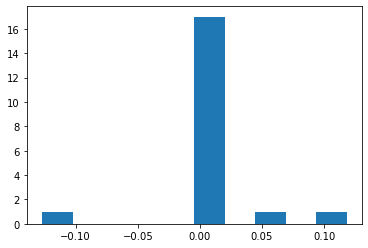

In [59]:
# compare longitude values got from getCoordinates and manual searching
plt.hist(matches0_edited.Longitude.values - matches0.Longitude.values)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  4., 14.,  0.,  1.]),
 array([-0.0702856 , -0.06027107, -0.05025654, -0.04024201, -0.03022748,
        -0.02021295, -0.01019842, -0.00018389,  0.00983064,  0.01984517,
         0.0298597 ]),
 <BarContainer object of 10 artists>)

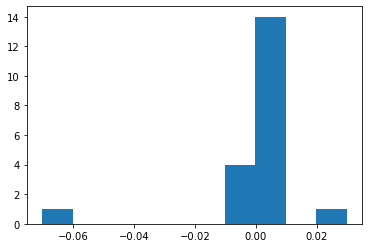

In [60]:
# compare latitude values got from getCoordinates and manual searching
plt.hist(matches0_edited.Latitude.values - matches0.Latitude.values)

In [61]:
matched = pd.read_csv('matched_edited.csv')

In [62]:
matched = matched[matched.City.isin(['Eugene', 'Springfield', 'Coburg'])]

In [63]:
outdata = matched.append(matches0_edited, ignore_index=False)

In [64]:
outdata.head()

,Business Name,Address,City,State,Zip Code,Longitude,Latitude
0,Everyday People Yoga,352 W. 12th Avenue,Eugene,OR,97401,-123.098084,44.046307
1,Reflections Salon,91049 South Willamette,Coburg,OR,97408,-123.065833,44.136608
4,Valley River Inn,1000 Valley River Way,Eugene,OR,97401,-123.102253,44.065724
7,Arriving By Bike,2705 Willamette St,Eugene,OR,97405,-123.090342,44.028776
8,Bike Friday,3364 W 11th Ave.,Eugene,OR,97402,-123.142143,44.047248


In [65]:
outdata.to_csv('bike_friendly_business.csv', index=False)

In [66]:
gdf = gpd.GeoDataFrame(outdata, geometry=gpd.points_from_xy(outdata.Longitude, outdata.Latitude))

In [67]:
gdf.crs = "EPSG:4326"

In [68]:
gdf = gdf.to_crs(epsg=3857)

In [69]:
MPObd = gpd.read_file("V:/Data/Transportation/MPO_Bound.shp")

In [70]:
outdata.City.unique()

array(['Eugene', 'Coburg', 'Springfield'], dtype=object)

In [71]:
outside = gpd.overlay(gdf, MPObd, how='difference')
outside

,Business Name,Address,City,State,Zip Code,Longitude,Latitude,geometry
15,Mohawk General Store,91130 Donna Rd.,Springfield,OR,97478,-122.916906,44.141897,POINT (-13683047.386 5487427.394)
27,McKenzie Orchards Bed & Breakfast,34694 McKenzie View Drive,Springfield,OR,97478,-122.986796,44.082419,POINT (-13690827.505 5478205.585)
3,Velo Bed and Breakfast,86211 Bailey Hill Road,Eugene,OR,97405,-123.171037,44.001673,POINT (-13711337.130 5465701.072)
6,Fox Springs Farm,28810 Fox Hollow Rd,Eugene,OR,97405,-123.205838,43.937241,POINT (-13715211.149 5455735.230)
7,McKenzie River Lavender,40882 McKenzie Hwy.,Springfield,OR,97478,-122.751585,44.079752,POINT (-13664643.903 5477792.264)
13,Johnson Brothers Greenhouses,91444 Coburg Rd,Eugene,OR,97408,-123.093147,44.144820,POINT (-13702666.422 5487880.878)


In [72]:
[x for x in outside['Business Name'].values if x in matches0_edited['Business Name'].values]

['Velo Bed and Breakfast',
 'Fox Springs Farm',
 'McKenzie River Lavender',
 'Johnson Brothers Greenhouses']

In [73]:
inside = gpd.overlay(gdf, MPObd, how='intersection')

In [74]:
outside['coords'] = outside['geometry'].apply(lambda x: x.representative_point().coords[:])
outside['coords'] = [coords[0] for coords in outside['coords']]

<ipython-input-75-5d9722e304ef>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['Business Name'], xy=row['coords'],


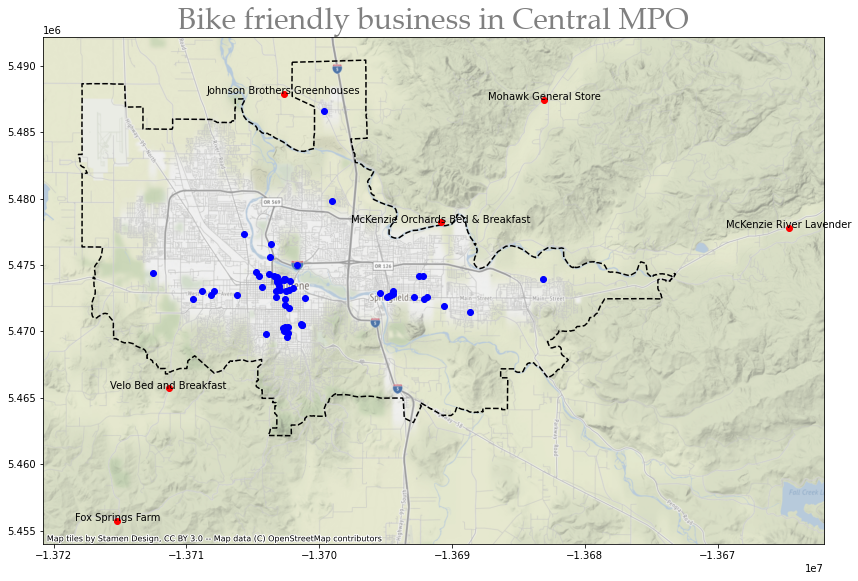

In [75]:
fig, ax = plt.subplots(figsize=(14, 12))
inside.plot(ax=ax, color='blue', aspect=1)
MPObd.plot(ax=ax, facecolor="none", edgecolor="black", linestyle='--', linewidth = 1.5, aspect=1)
outside.plot(ax=ax, color='red', aspect=1)
for idx, row in outside.iterrows():
    plt.annotate(s=row['Business Name'], xy=row['coords'],
                 horizontalalignment='center')
ctx.add_basemap(ax, alpha = 0.7)
plt.title("Bike friendly business in Central MPO", fontsize=30, fontname="Palatino Linotype", color="grey");

In [76]:
gdf.rename(columns={'Business Name': 'BizName'}, inplace=True)

In [77]:
gdf.to_file(os.path.join(r"T:\DCProjects\StoryMap\BikeCounting\BikeMap", "bike_friendly_business.shp"))